# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [274]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from importlib import reload
matplotlib = reload(plt)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_complete = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [275]:
# Checking the number of mice.
mice_total = len(mouse_metadata)
mice_total

249

In [276]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = study_complete[study_complete.duplicated(subset=["Mouse ID","Timepoint"])]["Mouse ID"].unique()

duplicate_mouse

array(['g989'], dtype=object)

In [277]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = study_complete.loc[study_complete["Mouse ID"] == "g989"]
duplicate_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [278]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_complete = study_complete.drop_duplicates(subset=["Mouse ID","Timepoint"])

clean_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [279]:
# Checking the number of mice in the clean DataFrame.
mice_total = len(clean_complete["Mouse ID"].unique())

mice_total

249

## Summary Statistics

In [280]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_group_mean = clean_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_group_median = clean_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_group_var = clean_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_group_std = clean_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_group_sem = clean_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

## Validation of statistics
#drug_group_mean.head(15)
#drug_group_median.head(15)
#drug_group_var.head(15)
#drug_group_std.head(15)
#drug_group_sem.head(15)

# Assemble the resulting series into a single summary DataFrame.
study_summary = pd.DataFrame({
    "Mean Tumor Volume": drug_group_mean,
    "Median Tumor Volume": drug_group_median,
    "Tumor Volume Variance": drug_group_var,
    "Tumor Volume Std. Dev.": drug_group_std,
    "Tumor Volume Std. Err.": drug_group_sem
})

study_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [281]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_complete.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_table



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

[Text(0, 0, '230'),
 Text(0, 0, '228'),
 Text(0, 0, '188'),
 Text(0, 0, '186'),
 Text(0, 0, '182'),
 Text(0, 0, '181'),
 Text(0, 0, '181'),
 Text(0, 0, '178'),
 Text(0, 0, '178'),
 Text(0, 0, '156')]

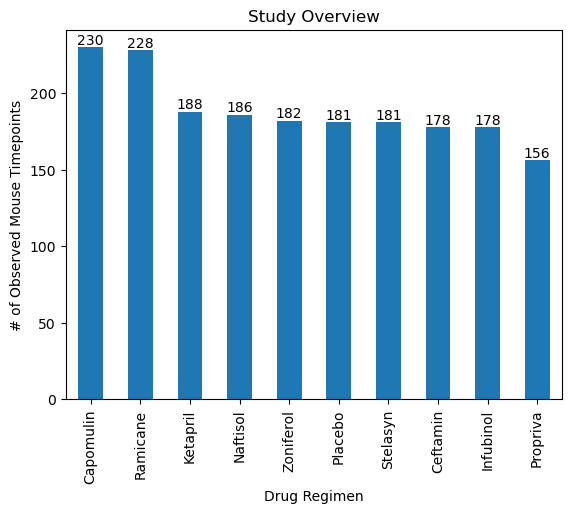

In [282]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
chart_pandas = clean_complete.groupby(
    "Drug Regimen")["Mouse ID"].count().sort_values(ascending=False).plot(
    kind="bar", title = "Study Overview", xlabel = "Drug Regimen",
    ylabel = "# of Observed Mouse Timepoints")

chart_pandas.bar_label(chart_pandas.containers[0])

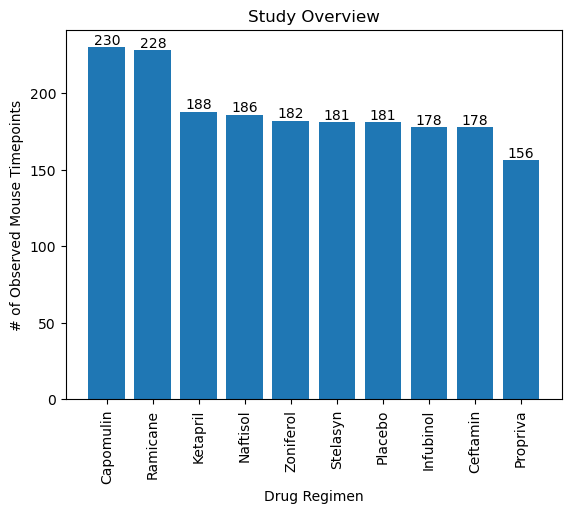

In [283]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

## Get counts from each Drug Regimen

values = clean_complete["Drug Regimen"].value_counts()

## Create plot
fig, ax = plt.subplots()
bar_container = ax.bar(values.keys(), values)
plt.title("Study Overview")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)

ax.bar_label(bar_container)

plt.show()

<Axes: ylabel='Count'>

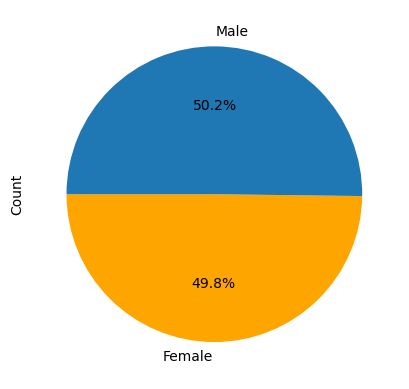

In [284]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_distribution = mouse_metadata.groupby("Sex")["Sex"].count()

sex_distribution.head()

# Make the pie chart
sex_distribution.plot.pie(y=sex_distribution, autopct="%1.1f%%", 
                           startangle = 180, ylabel = "Count", colors = ["orange", "#1f77b4"])


# # Get the unique mice with their gender
# mice_df = clean_complete.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()

# mice_df.head()

# # Make the pie chart
# counts = mice_df.Sex.value_counts()
# counts.plot(kind="pie",autopct='%1.1f%%')
# plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

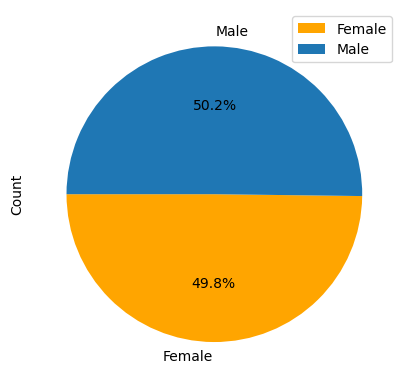

In [285]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_distribution = mouse_metadata.groupby("Sex")["Sex"].count()
sex_labels = sex_distribution.keys()

# Make the pie chart

fig, ax = plt.subplots()
ax.pie(sex_distribution, labels = sex_labels, autopct='%1.1f%%', 
       startangle = 180, colors = ["orange", "#1f77b4"])
plt.legend(sex_distribution.index)
plt.ylabel("Count")

plt.show

#  Get the unique mice with their gender
# mice_df = clean_study_data_complete.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()

# # Make the pie chart
# counts = mice_df.Sex.value_counts()
# plt.pie(counts.values, labels=counts.index.values, autopct='%1.1f%%')
# plt.ylabel("count")
# plt.show()


## Quartiles, Outliers and Boxplots

In [286]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = clean_complete.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

#max_tumor.head()

merged_data = max_tumor.merge(clean_complete,on=['Mouse ID','Timepoint'],how="left")

merged_data.head(25)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [287]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

## Create empty list to fill with tumor vol data (for plotting)
final_tumor_volumes = []
for drug in treatments:
    volumes = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    # add subset
    final_tumor_volumes.append(volumes)

## Calculate the IQR and quantitatively determine if there are any potential outliers.

## Getting quartiles
    quartiles = volumes.quantile([0.25, 0.5, 0.75])

    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]

## Calculating IQR
    IQR = Q3 - Q1

# Determine outliers using upper and lower bounds

# Calculating lower and upper bounds
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)

# Get the outliers

    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]

# At the start of the loop:

    print(f"Processing drug: {drug}")
    print(f"Outlier found: {outliers}")


Processing drug: Capomulin
Outlier found: Series([], Name: Tumor Volume (mm3), dtype: float64)
Processing drug: Ramicane
Outlier found: Series([], Name: Tumor Volume (mm3), dtype: float64)
Processing drug: Infubinol
Outlier found: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Processing drug: Ceftamin
Outlier found: Series([], Name: Tumor Volume (mm3), dtype: float64)


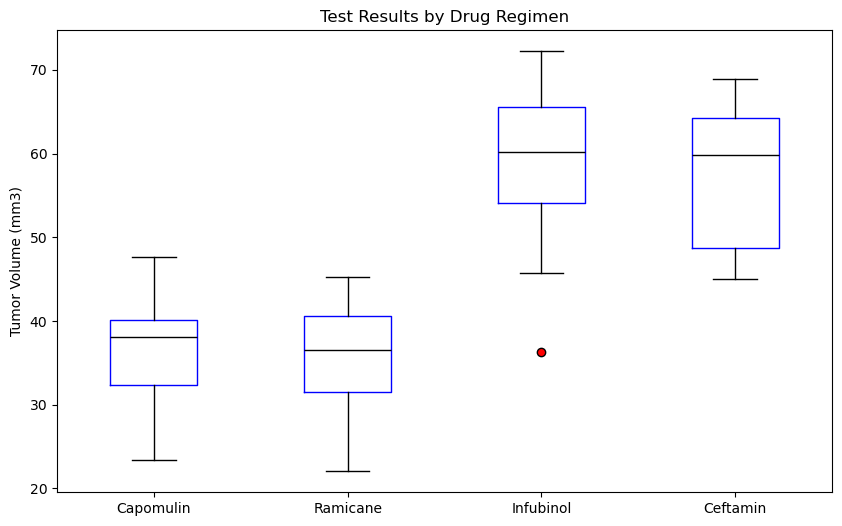

In [288]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.figure(figsize=(10,6))
plot_data = [volumes for volumes in final_tumor_volumes if len(volumes) > 0]
# Create box plot with customization
plt.boxplot(plot_data,
           labels=treatments,
           flierprops={'marker':'o', 'markerfacecolor':'red'},
           medianprops={'color':'black'},
           boxprops={'color':'blue'})

# Add labels
plt.title("Test Results by Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

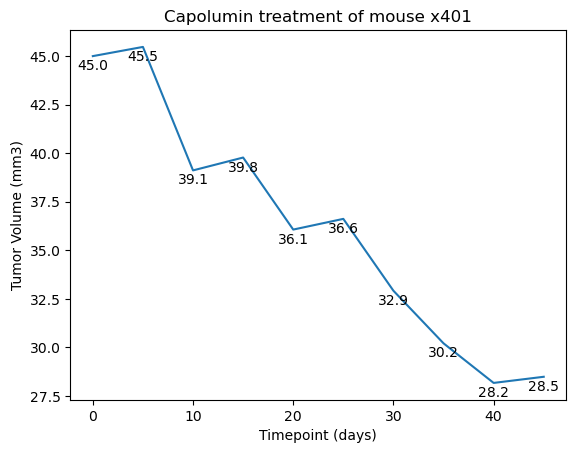

In [306]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

## Prepare data from mouse x401 treated with Capomulin for line plot

mouse_x401 = clean_complete.loc[clean_complete["Mouse ID"] == "x401",["Timepoint","Tumor Volume (mm3)"]]

## Check data
x = mouse_x401["Timepoint"]
y = mouse_x401["Tumor Volume (mm3)"]

plt.plot(x, y)
plt.title("Capolumin treatment of mouse x401")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

## Annotations for each value

for xs, ys in zip(x, y):
    label = "{:.1f}".format(ys)
    
    plt.annotate(label, (xs, ys), textcoords="offset points", xytext=(0,-10), ha = "center")

plt.show()


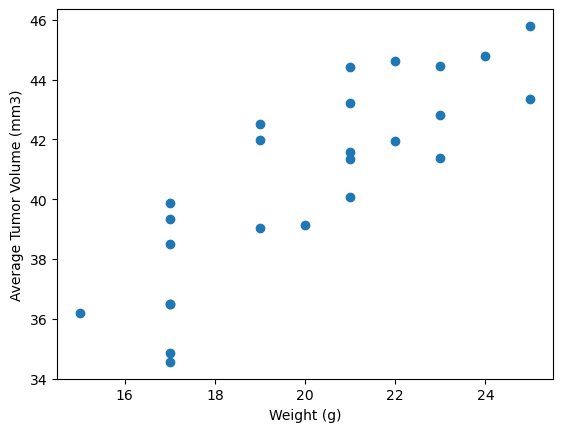

In [329]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

## Prepare data for scatter plot
data_scatter = clean_complete.loc[clean_complete["Drug Regimen"] == "Capomulin",["Weight (g)","Tumor Volume (mm3)", "Mouse ID"]]
data_scatter_avg = data_scatter.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

data_scatter_avg.head(40)

x = data_scatter_avg["Weight (g)"]
y = data_scatter_avg["Tumor Volume (mm3)"]

## Generate scatter plot
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


# Correlation and Regression



The correlation between mouse weight and the average tumor volume is 0.84.


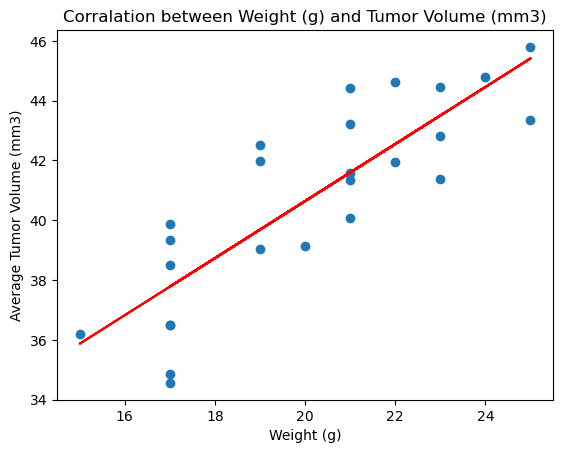

In [342]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

## Generate the linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
line = slope*x+intercept
r_value = "{:.2f}".format(r_value)

## Print the correlation value
print(f"The correlation between mouse weight and the average tumor volume is {r_value}.")


## Generate scatter plot with linear regression
plt.plot(x, line, "r", label = "fitted line")

plt.scatter(x,y)
plt.title("Corralation between Weight (g) and Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

